### Some Observations

So, I have some data that I collected overnight that I can use for analysis. This is for the VP market, where ultimately 25-29 won over 30-34.

There are, essentially, two things people can do at each time:

Buy and hold and hope
OR
Cut losses

Which one will they choose?

https://www.predictit.org/markets/detail/5268

Data saved to a pickle file: overnightdata.p
Type: a list of tuples, such as:

[(0.01, 0.01, None, None, 0.99), (0.39, 0.35, 0.72, 0.28, 0.65), (0.68, 0.72, 0.36, 0.64, 0.28), (0.05, 0.06, 0.95, 0.05, 0.94), (0.01, 0.01, None, None, 0.99), (0.01, 0.01, None, None, 0.99), (0.01, 0.01, None, None, 0.99)]

Base3 has an implementation for saving and opening it.

First analysis I want to do is to plot some of it. So I need to get out the data:

In [ ]:
G = PredictionBase()
G.pickleread("overnightdata.p")
m = G._storagecontainer

#   OR 

m = pickle.load(open("overnightdata.p", "rb")

for i in m:
    one.append(i[1])
    
for i in m:
    two.append(i[2])

qip = [one[i][0] + two[i][0] for i in range(len(one))]

__qip__ is an interesting thing: It is the price of these two (almost-sure) contracts together - albeit a tweetstorm.

This with matplotlib's simple  _plot_ function.

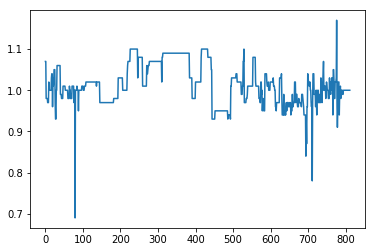

In [2]:
from IPython.display import Image
Image(filename='qip.png') 

In [ ]:
Pop the outliers, and you have:

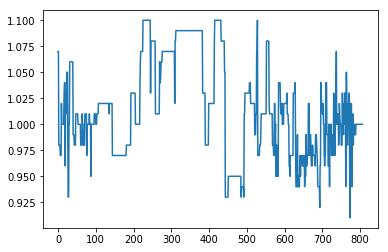

In [3]:
Image(filename='qip2.png') 

But wait! Now that we are plotting, I forgot to show the very first thing.

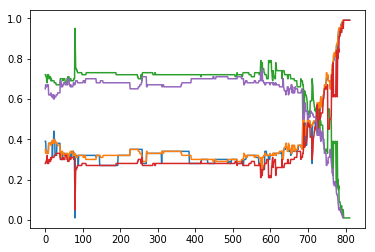

In [4]:
Image(filename='one.png')


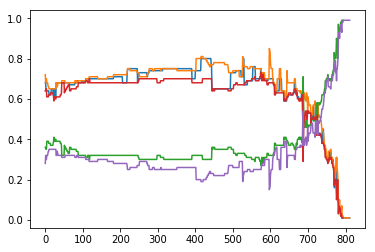

In [5]:
Image(filename='two.png')

So what we have above is basically the markets by these lines:
BLUE = lastTradePrice
ORANGE = bestBuyYesCost
GREEN = bestBuyNoCost
RED = bestSellYesCost
PURPLE = bestSellNoCost

bestSellYesCost = if I want to dump, that's the price they're gonna pay.


This is the default color scheme in order, and the order in which the data was stored per Base3.py.

Not terribly useful either. It's just the spread (without the NO lastTradePrice).

So at this point, I want to zoom in on the action first. Just to see what's happening. Give me a moment...


In [ ]:
onea = one[-250:]

twoa = two[-250:]

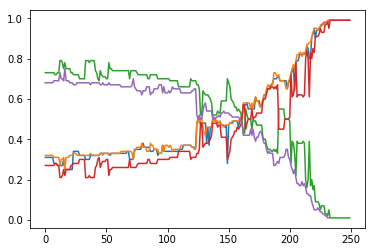

In [6]:
Image(filename='onea.png')

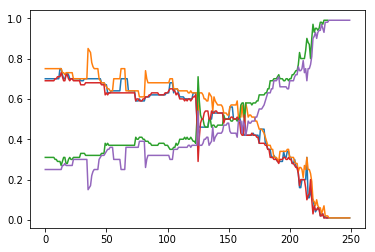

In [8]:
Image(filename='twoa.png')

A bit more interesting here in the action.
Now these are minute-by-minute information. So each tick is 50 minutes. 

Too much data - it seems like there's a big spike in bestBuyNoCost and drop in bestSellYesCost - not sure if the others also did that.

Question: What would Jerod do?
Background: 1 tweet to flip by 12PM.

I would've bought and held with a tweettimer by me just in case. Actually, before that, I would analyze how often a tweet came in the morning, 1st in general and then by day (Friday) AND checked the VP's schedule.

Unless something happens, there's a slow drift up for B1. If a tweet comes, B1 immediately zeros and B2 spikes. Slow drift down for B2 in the meantime.


Also look at 1 - somebody made a dump of their yes shares (bad idea in retrospect) around the 200 mark, which filled all the bestSellYesCost orders. Or maybe the regulars just got cold feet.

__What to NEVER do__: Buy-In, sell higher, then Buy-In without a hedge or strategy. 
"picking up nickels in front of a steamroller"
- This refers to a wide variety of financial strategies where you make an immediate small profit by taking on the risk of a large or unlikely-to-happen event.

2/25/2019: Added graphing function.

__Renamed Base4.1__

-  The new function is __gatherplot__.
-  plt.figure() brings up an empty figure
-  plt.ion() makes it... adaptive?
-  Finally figured out that plt.pause(int) unfreezes it for operations. Unfortunatly it does also supercede the domestic sleep() function.
-  Hopefully plt.xlim(left = last, right = last + timedelta(hours=1)) makes it an hour.

- __getnames__ returns a list for the legend.

-  Made a pandas dataframe with __reduce__ (actually it gives a dict that will be made into a pandas dataframe).
-  Originally hoped to "append" onto the dataframe so to create less work.
-  Still possible... don't forget the syntax has to be key, value in blah.__items()__. Very important.

-  __reduce__ reduces the dictionary to only the last sale prices. Super weird testing to get the correct syntax. Will show a sample:

{datetime.datetime(2019, 2, 25, 20, 45): [0.01,
  0.01,
  0.01,
  0.02,
  0.16,
  0.37,
  0.43],
  ...
  }
  
  The actual make-it-a-pandas-DataFrame (capital D and F) is just pd.DataFrame.from_dict and make sure to orient the index.
  Sometimes the docstring helps. Sometimes documentation is horrible or nonexistent. I want to find out the args and kwargs.
  

In [6]:
    def gatherplot(self, n = 24*60):
        """Base demonstration of data gathering.
        Prints the list of Last Trade Prices, starting from 
        Gather data n times. If not specified, will run for 1 day (24*60 times)
        %matplotlib in ipython to do in separate window."""
        
        plt.figure() 
        plt.ion()
        legend = self.getnames()
        self._onetimedatagathering()  
        
        for i in range(n - 1):
            plt.pause(60.0)                
            try:
                self._onetimedatagathering()
            except:
                self.play("pcvoice.mp3")
                input("Error retrieving tweets. Please press enter to continue.")
                
            frame = self._reduce()
            df = pd.DataFrame.from_dict(frame, orient = "index")
            try:
                last = df.index[-100]
            except:
                last = df.index[0]
                      
            plt.plot(df)
            plt.legend(legend)
            left, right = plt.xlim()
            plt.xlim(left = last, right = last + timedelta(hours=1))
            plt.show()
            
    
    def getnames(self):
        container = []

        contracts = self._rawdict["contracts"]
        contracts.sort(key = lambda x: x["name"]) #needed because of obfuscation
        for i in contracts:
            name = i["name"]
            container.append(name)
        return container
    
    def _reduce(self):
        """Prepare last trade price for plotting"""
        # if you're creating a new one every time, then it might be better to "add on" each time.

        frame = {key:[(value[i][0]) for i in range(len(value))] for key, value in self._storagecontainer.items()}
        
        return frame

__plotting__ used to be a separate function, but I didn't know what was causing issues so I just smashed it all together. Perhaps I'll separate it again.

Basically matplotlib does NOT like it when you put things in while loops.